In [2]:
import calendar
c = calendar.TextCalendar()
print(c.formatmonth(2024,1))

    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



In [13]:
import time as t
lt = [ x for x in range(100000)]
tp = tuple([ x for x in range(4000000)]) 
print(type(lt))
print(type(tp))

<class 'list'>
<class 'tuple'>


In [16]:
# 측정 시작
start = t.time() # 필수 1
for i in lt:
    pass
print(t.time() - start) # 필수2
print('튜플 속도:')

0.024332523345947266
튜플 속도:


# Requests

### 환정보

In [5]:
import requests as req
gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()
data = gdata[0]
date = data['date']
time = data['time']
bprice = data['basePrice']
print(f'{date}\n{time}\n1달러에 {bprice}원')

2024-01-23
09:57:51
1달러에 1336.4원


In [6]:
inp = input('환전하고 싶은 달러를 입력하세요')
result = float(inp) * float(bprice)
print(f'지금의 환율은 1달러에 {format(bprice,",")} 입니다. 요청하신 {inp} 달러는 {format(round(result),",")}원 입니다.')

환전하고 싶은 달러를 입력하세요 222


지금의 환율은 1달러에 1,336.4 입니다. 요청하신 222 달러는 296,681원 입니다.


In [ ]:
import time as t
while 1:    
    with open('krwusd.txt','a') as f:
        data = f'{data},{time},{float(bprice)}\n'
        f.write(data)
    print(f'{time}기록 완료')
    t.sleep(60*60)

09:57:51기록 완료


### 비트코인 정보

In [ ]:
import requests as req
gdata = req.get('https://api.bithumb.com/public/ticker/ALL_KRW').json()
btc = gdata['data']['BTC']
print(btc)

maxp = float(btc['max_price'])
minp = float(btc['min_price'])
openp = float(btc['opening_price'])
bandp = float(maxp) - float(minp)
print(f'최대가: {max} / 최저가: {min} / 시작가: {openp}')

if (openp + bandp) > maxp:
    print('상승장')
else:
    print('하락장')

## 카카오 API

In [57]:

# coding=utf8
# REST API 호출에 필요한 라이브러리
import requests
import json

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = 'aff5ee843b80895f76ae33e065389f41'

# KoGPT API 호출을 위한 메서드 선언
# 각 파라미터 기본값으로 설정
def kogpt_api(prompt, max_tokens = 1, temperature = 1.0, top_p = 1.0, n = 1):
    r = requests.post(
        'https://api.kakaobrain.com/v1/inference/kogpt/generation',
        json = {
            'prompt': prompt,
            'max_tokens': max_tokens,
            'temperature': temperature,
            'top_p': top_p,
            'n': n
        },
        headers = {
            'Authorization': 'KakaoAK ' + REST_API_KEY,
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

# KoGPT에게 전달할 명령어 구성
prompt = '''인간처럼 생각하고, 행동하는 '지능'을 통해 인류가 이제까지 풀지 못했던'''

# 파라미터를 전달해 kogpt_api()메서드 호출
prompt='''카카오(각자대표 남궁훈, 홍은택)의 임팩트 커머스 카카오메이커스와 카카오브레인(대표 김일두)이 '세계 동물의 날'을 맞아 멸종 위기 동물 보호에 힘을 보탠다. 

카카오메이커스와 카카오브레인은 4일 세계 동물의 날을 맞아, 카카오브레인의 AI 아티스트 '칼로' 와 현대미술가 고상우 작가가 협업한 제품을 오는 12일까지 카카오메이커스에서 단독 판매한다고 밝혔다. 판매 수익금 전액은 WWF(세계자연기금)에 기부할 예정이다. 

이번 프로젝트에 참여한 AI 아티스트 '칼로'는 'minDALL-E', 'RQ-Transformer' 등 카카오브레인의 초거대 이미지 생성 AI 모델을 발전시켜 하나의 페르소나로 재탄생한 AI 아티스트다. 1.8억 장 규모의 텍스트-이미지 데이터셋을 학습해 이해한 문맥을 바탕으로 다양한 화풍과 스타일로 이미지를 생성할 수 있다. 올해 6월에는 고상우 작가와의 공동 작업으로 생성한 1,000개의 호랑이 이미지를 조합한 디지털 작품으로 전시회를 진행한 바 있다. 

이번 프로젝트를 통해 선보이는 제품은 맨투맨과 머그컵이다. '칼로'가 생성한 호랑이 그림과 푸른색 사진 예술의 선구자인 고상우 작가 특유의 드로잉이 조화롭게 어우러져 완성된 500점의 호랑이 그림 모자이크 'Blue Tiger'가 새겨져 있다. 판매 수익금 전액은 WWF(세계자연기금)에 기부됨과 동시에, 낭비 없는 생산을 위해 주문 수량만큼 제품을 생산하는 카카오메이커스의 환경친화적 주문제작 방식(POD 생산)을 도입했다. 

카카오브레인 김일두 대표는 "AI 아티스트 칼로가 생성한 예술 작품으로 멸종 위기 동물 보호 활동에 동참하게 되어 기쁘다"며, "앞으로도 우리의 AI 기술을 통해 사회에 환원할 수 있는 의미 있는 프로젝트에 지속 참여하겠다"며 포부를 전했다. 

카카오 정영주 메이커스 실장은 "지난 8월 고양이의 날을 기념한 제품을 기획/판매해 기부한데 이어 사회의 다양한 구성원을 존중하고 배려하는 프로젝트를 이어가고 있다"며 "더 나은 세상을 만들기 위한 이용자들의 관심을 확인하고 있으며, 앞으로도 임팩트 커머스로서 다양한 가치를 담은 메이커스만의 제품을 선보일 것" 이라고 밝혔다.

한줄 요약:'''
response = kogpt_api(prompt, max_tokens=128, top_p=0.7)

print(response)

{'id': '568dec76-adbb-4d14-a137-bd33095564ff', 'generations': [{'text': " 카카오커머스와 카카오브레인이 멸종위기 동물 보호를 위해 선보인 '카카오메이커스X칼로 에디션'을 오는 5~12일 일주일간 판매하고 판매금전액은 WWF(세계자연기금)에 기부된다.", 'tokens': 50}], 'usage': {'prompt_tokens': 524, 'generated_tokens': 50, 'total_tokens': 574}}


In [58]:
!pip install image

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 850.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 884.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.3 MB/s eta 0:00:00


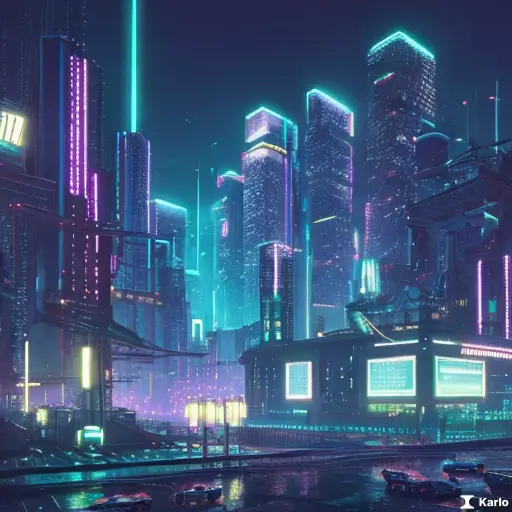

In [77]:
# REST API 호출, 이미지 파일 처리에 필요한 라이브러리
import requests
import json
import urllib
from PIL import Image

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = 'aff5ee843b80895f76ae33e065389f41'

# 이미지 생성하기 요청
def t2i(prompt, negative_prompt):
    r = requests.post(
        'https://api.kakaobrain.com/v2/inference/karlo/t2i',
        json = {
            'prompt': prompt,
            'negative_prompt': negative_prompt
        },
        headers = {
            'Authorization': f'KakaoAK {REST_API_KEY}',
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

# 프롬프트에 사용할 제시어
prompt = "cyberpunk"
negative_prompt = "sleeping cat, dog, human, ugly face, cropped"

# 이미지 생성하기 REST API 호출
response = t2i(prompt, negative_prompt)

# 응답의 첫 번째 이미지 생성 결과 출력하기
# result = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
# result.show() 
Image.open(urllib.request.urlopen(response["images"][0]["image"]))

### 네이버 api

In [2]:
import os
import sys
import json
import urllib.request
from dotenv import load_dotenv
# load .env
load_dotenv()
client_id = os.environ.get('NAVER_API_ID')
client_secret = os.environ.get('NAVER_API_PW')
# client_id = "RQqoXOjV760i_VS4coAT" # 개발자센터에서 발급받은 Client ID 값
# client_secret = "oHwPzdtExO" # 개발자센터에서 발급받은 Client Secret 값
inp = input('영어로 번역할 한국어를 작성하세요.')
encText = urllib.parse.quote("반갑습니다")
data = "source=ko&target=en&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    data = json.loads(response_body.decode('utf-8'))['message']['result']['translatedText']
    print(data)
else:
    print("Error Code:" + rescode)

ModuleNotFoundError: No module named 'dotenv'

## 사설 파파고 번역기

# Web Crawkubg

## 부산대학교 학식정보 크롤링하기

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
web = req.get('https://www.pusan.ac.kr/kor/CMS/MenuMgr/menuListOnBuilding.do?mCode=MN202#childTab_tmp')
soup = bs(web.content, 'html5lib')
date = soup.select('.menu-tbl .date')
day = soup.select('.menu-tbl .day')
won = soup.select('h3.menu-tit01')
menu = soup.select('h3.menu-tit01+p')
for y,d,w,m in zip(date,day,won,menu):
    print('-'*15)
    print(f'{y.text} ({d.text})')
    print('-'*15)
    print(w.text)
    print(m.text)

---------------
2024.01.22 (월)
---------------
정식-5,500원
백미밥
동태국
돈육볶음
해쉬브라운+케찹
쫄면야채무침
청경채겉절이
포기김치

---------------
2024.01.23 (화)
---------------
정식-5,500원
잡곡밥
시락국
치즈돈가스/소스
마파두부
치커리유자청샐러드
콩나물무침
포기김치

---------------
2024.01.24 (수)
---------------
정식-5,500원
백미밥
감자탕
생선가스/소스
떡볶기
다시마채무침
상추겉절이
포기김치

---------------
2024.01.25 (목)
---------------
정식-5,500원
백미밥
바지락미역국
언양산적/소스
카레
사각어묵매콤무침
오이무침
포기김치

---------------
2024.01.26 (금)
---------------
정식-5,500원
잡곡밥
우동
순살치킨/맛초킹소스
순대매콤볶음
후랑크햄옥수수콘볶음
콩나물무침
포기김치



In [12]:
!pip install html5lib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 228.7 kB/s eta 0:00:00a 0:00:01


In [3]:
import Busanunivmeal as b
b.Busunv()
print(b.__name__)

---------------
2024.01.22 (월)
---------------
정식-5,500원
백미밥
동태국
돈육볶음
해쉬브라운+케찹
쫄면야채무침
청경채겉절이
포기김치

---------------
2024.01.23 (화)
---------------
정식-5,500원
잡곡밥
시락국
치즈돈가스/소스
마파두부
치커리유자청샐러드
콩나물무침
포기김치

---------------
2024.01.24 (수)
---------------
정식-5,500원
백미밥
감자탕
생선가스/소스
떡볶기
다시마채무침
상추겉절이
포기김치

---------------
2024.01.25 (목)
---------------
정식-5,500원
백미밥
바지락미역국
언양산적/소스
카레
사각어묵매콤무침
오이무침
포기김치

---------------
2024.01.26 (금)
---------------
정식-5,500원
잡곡밥
우동
순살치킨/맛초킹소스
순대매콤볶음
후랑크햄옥수수콘볶음
콩나물무침
포기김치

Busanunivmeal


## 네이버 주식정보 크롤링하기

In [15]:
import requests as req
# from bs4 import BeautifulSoup as bs
url = 'https://finance.naver.com/sise/lastsearch2.nhn'
web = req.get(url)

# 기본 
# html = web.text
# print(html.find('74,000')) # find로 스트링 시작값 찾아내기
# print(html[34526:34530],html[34599:34605]) # 관련내용 출력


# soup.find('삼성전자')


# soup 사용
soup = bs(web.content, 'html.parser')
contents = soup.find_all(class_='tltle')
# print(contents)
# for data, n in zip(contents, range(len(contents))):
for n, data in enumerate(contents):
    print(f'{n}:{data.text}')

0:제주반도체
1:삼성전자
2:우진엔텍
3:SFA반도체
4:POSCO홀딩스
5:에코프로
6:어보브반도체
7:에코프로머티
8:HLB
9:신성델타테크
10:에코프로비엠
11:엔케이맥스
12:코세스
13:카나리아바이오
14:SK하이닉스
15:포스코DX
16:포스코퓨처엠
17:셀트리온
18:LG에너지솔루션
19:SK이노베이션
20:인성정보
21:LS머트리얼즈
22:네오셈
23:이스트소프트
24:삼성SDI
25:두산로보틱스
26:삼성바이오로직스
27:고영
28:하나마이크론
29:한미반도체


In [16]:
!pip install pyOpenSSL

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 186.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 372.7 kB/s eta 0:00:0000:0100:01


In [2]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://www.melon.com/chart/index.htm'
headers = {'User-Agent:':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
web = req.get(url,headers = headers)
soup = bs(web.content,'html.parser')
day = soup.select('.year')
hour = soup.select('.hour')
rank = soup.select('.wrap_song_info .ellipsis span a')
print(day[0].text,hour[0].text)
n = 0
for i,r in enumerate(rank):
    if(i % 2 == 0):
        print(f'{n}위: {r.text}',end=' ')
    else:
        print(f'{r.text}')
        if n == 20 : break

InvalidHeader: Invalid leading whitespace, reserved character(s), or returncharacter(s) in header name: 'User-Agent:'

## 워크넷 크롤링

In [12]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://www.work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?careerTo=&keywordJobCd=&occupation=&templateInfo=&shsyWorkSecd=&rot2WorkYn=&payGbn=&resultCnt=10&keywordJobCont=&cert=&cloDateStdt=&moreCon=more&minPay=&codeDepth2Info=11000&isChkLocCall=&sortFieldInfo=DATE&major=&resrDutyExcYn=&eodwYn=&sortField=DATE&staArea=&sortOrderBy=DESC&keyword=&termSearchGbn=all&carrEssYns=&benefitSrchAndOr=O&disableEmpHopeGbn=&webIsOut=&actServExcYn=&maxPay=&keywordStaAreaNm=&emailApplyYn=&listCookieInfo=DTL&pageCode=&codeDepth1Info=11000&keywordEtcYn=&publDutyExcYn=&keywordJobCdSeqNo=&exJobsCd=&templateDepthNmInfo=&computerPreferential=&regDateStdt=&employGbn=&empTpGbcd=1&region=&infaYn=&resultCntInfo=10&siteClcd=all&cloDateEndt=&sortOrderByInfo=DESC&currntPageNo=1&indArea=&careerTypes=N&searchOn=Y&tlmgYn=&subEmpHopeYn=&academicGbn=&templateDepthNoInfo=&foriegn=&mealOfferClcd=&station=&moerButtonYn=&holidayGbn=&srcKeyword=java+python&enterPriseGbn=all&academicGbnoEdu=noEdu&cloTermSearchGbn=all&keywordWantedTitle=&stationNm=&benefitGbn=&keywordFlag=&notSrcKeyword=&essCertChk=&isEmptyHeader=&depth2SelCode=&_csrf=fc44a0b2-9d07-43fc-b711-6f5090156924&keywordBusiNm=&preferentialGbn=&rot3WorkYn=&pfMatterPreferential=&regDateEndt=&staAreaLineInfo1=11000&staAreaLineInfo2=1&pageIndex=1&termContractMmcnt=&careerFrom=&laborHrShortYn=#viewSPL'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0} Gecko/20100101 Firefox/91.0'}
web = req.get(url, headers = headers)
soup = bs(web.content, "html.parser")
contents = soup.select('.cp-info-in')
for i, c in enumerate(contents,1):
    print(f'{i+1}:{c.text.strip()}\n{"https://www.work.go.kr" + c.find("a")["href"].replace(" ","")}')

2:포인드(주) 인공지능·딥러닝 개발자 채용 (신입)
https://www.work.go.kr/empInfo/empInfoSrch/detail/empDetailAuthView.do?searchInfoType=VALIDATION&callPage=detail&wantedAuthNo=K141212401250005&rtnTarget=list1
3:㈜포스텍 IT기술직 신규사원 모집
https://www.work.go.kr/empInfo/empInfoSrch/detail/retrivePriEmpDtlView.do?searchInfoType=CSI&iorgGbcd=CSI&callPage=detail&wantedAuthNo=47396678&rtnTarget=list2&pageIndex=1&rtnUrl=/empInfo/empInfoSrch/list/dtlEmpSrchList.do?len=0&srcKeyword=javapython&regionArr=[Ljava.lang.String;@ab0d17bc&moreCon=more&pageSize=10&firstIndex=1&lastIndex=1&recordCountPerPage=10&academicGbnoEdu=noEdu&careerTypes=N&siteClcd=all&benefitSrchAndOr=O&areaRegion=11000&areaArc=1&staAreaLineInfo1=11000&staAreaLineInfo2=1&codeDepth1Info=11000&codeDepth2Info=11000&listCookieInfo=DTL&srchJobNum=0&resultCntInfo=10&sortOrderByInfo=DESC&sortFieldInfo=DATE&empTpGbcd=1&sortField=DATE&sortOrderBy=DESC&resultCnt=10&keyword=java+python&enterPriseGbn=all&termSearchGbn=all&&onlyTitleSrchYn=N&cloTermSearchGbn=all
4:[원팀원스